In [136]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
%matplotlib inline


In [137]:
my_data_dir = 'C:\\Users\\Marcin\\Desktop\\Python\\Studia\\RoadClassification\\baza'

In [138]:
os.listdir(my_data_dir)

['train', 'val']

In [139]:
val_path = my_data_dir+'\\val\\'
train_path = my_data_dir+'\\train\\'

In [140]:
os.listdir(val_path)

['Asfalt', 'Kostka', 'Polna_v', 'Utwardzona']

In [141]:
os.listdir(train_path)

['Asfalt', 'Kostka', 'Polna', 'Utwardzona']

In [142]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [143]:
train_image_gen = ImageDataGenerator(rescale=1. /255,# Rescale the image by normalzing it
                                     horizontal_flip = True,
                                     vertical_flip= True,
                                     brightness_range=[0.2,1.0],
                                     featurewise_center=True,
                                     featurewise_std_normalization=True
                              )

In [144]:
val_image_gen = ImageDataGenerator(rescale=1. /255, # Rescale the image by normalzing it
                              )

In [148]:
image_shape = (220,220,3)
batch_size = 16

In [149]:
train_images = train_image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               class_mode='categorical',
                                                  batch_size=batch_size)

Found 627 images belonging to 4 classes.


In [150]:
val_images = val_image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=batch_size,
                                             shuffle = False)

Found 210 images belonging to 4 classes.


In [151]:
x,y = train_images.next()

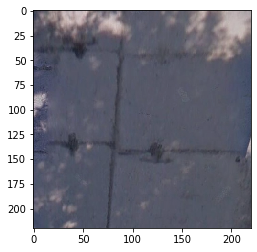

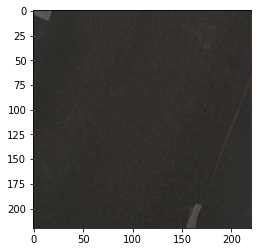

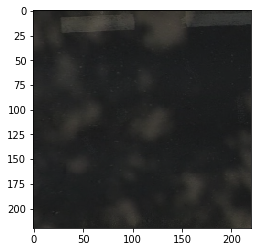

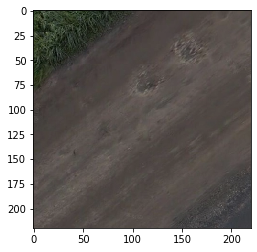

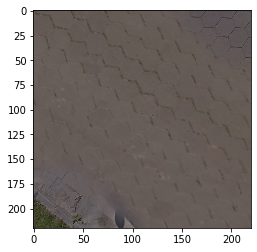

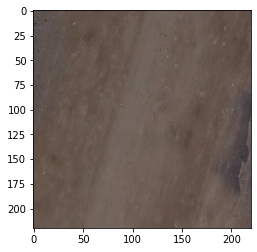

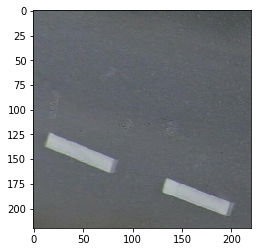

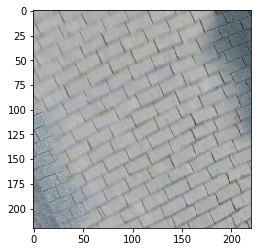

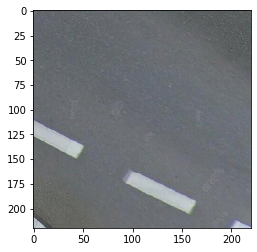

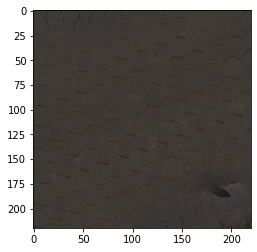

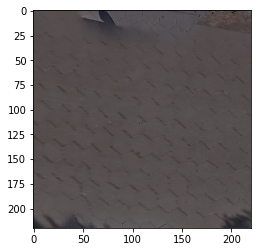

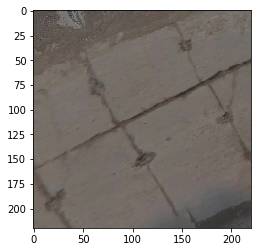

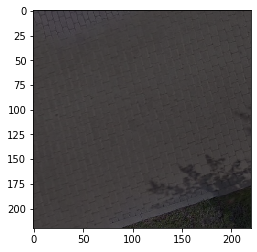

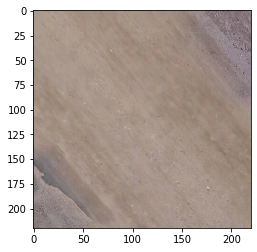

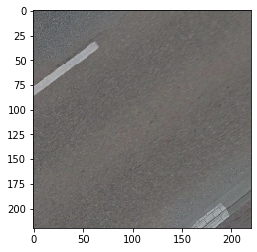

In [152]:
for i in range(0,15):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [153]:
#using initializations described in Kaiman paper should develop perfomance on conv lauers
conv_initializer = tf.keras.initializers.he_uniform(
    seed=None
)

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [155]:
#with tf.device('/GPU:0'):
#gpu_options = tf.GPUOptions(allow_growth=True)
#session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5),input_shape=image_shape, activation='relu', strides=(2,2), 
                 kernel_initializer=conv_initializer))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer=conv_initializer))
#model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer=conv_initializer))
#model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer=conv_initializer))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer=conv_initializer))
#model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer=conv_initializer))
#model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer=conv_initializer))
model.add(MaxPooling2D(pool_size=(3, 3)))
                       
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)
model.add(Flatten())

model.add(Dense(384, activation='relu'))

model.add(Dense(64, activation='relu'))

#Final layer
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [133]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 108, 108, 32)      2432      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 104, 104, 32)      9248      
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 102, 102, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 51, 51, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 49, 49, 32)        9248      
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 47, 47, 32)       

In [117]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#with tf.device('/GPU:0'):

Num GPUs Available:  1


In [156]:
from tensorflow.keras.callbacks import EarlyStopping    

In [157]:
early_stop = EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)

In [158]:
#https://stackoverflow.com/questions/48225729/importerrorcould-not-import-pil-image-working-with-keras-ternsorflow/50775336
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [159]:
from PIL import Image
print(Image.__file__)
import Image
print(Image.__file__)

C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\PIL\Image.py
C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\PIL\Image.py


In [160]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
with tf.device('/GPU:0'):
    results = model.fit_generator(train_images,epochs=50,
                                  validation_data=val_images,
                                 callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 40 steps, validate for 14 steps
Epoch 1/50
40/40 [==============================] - 13s 336ms/step - loss: 1.4107 - accuracy: 0.2552 - val_loss: 1.3718 - val_accuracy: 0.2667
Epoch 2/50
40/40 [==============================] - 8s 202ms/step - loss: 1.3845 - accuracy: 0.2679 - val_loss: 1.3719 - val_accuracy: 0.2667
Epoch 3/50
40/40 [==============================] - 8s 207ms/step - loss: 1.3820 - accuracy: 0.2982 - val_loss: 1.3844 - val_accuracy: 0.2524
Epoch 4/50
40/40 [==============================] - 8s 196ms/step - loss: 1.3949 - accuracy: 0.2727 - val_loss: 1.3834 - val_accuracy: 0.2524
Epoch 5/50
40/40 [==============================] - 8s 208ms/step - loss: 1.3833 - accuracy: 0.2424 - val_loss: 1.3843 - val_accuracy: 0.2667
Epoch 6/50
40/40 [==============================] - 8s 208ms/step - loss: 1.3872 - accuracy: 0.2552 - val_loss: 1.3833 - val_accuracy: 0.2667


In [68]:
from tensorflow.keras.models import load_model

In [5]:
#model = load_model("./modele/Model2_4cat.h5")

In [94]:
losses = pd.DataFrame(model.history.history)

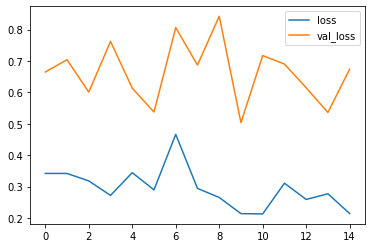

In [95]:
losses[['loss','val_loss']].plot()

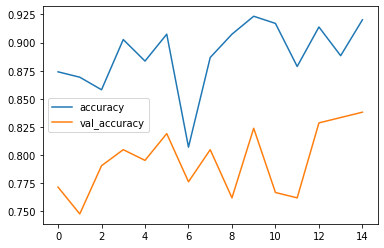

In [96]:
losses[['accuracy','val_accuracy']].plot()

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [97]:
model.evaluate_generator(val_images)

  ...
    to  
  ['...']


[0.5036886313131878, 0.8238095]

In [162]:
def getPredictionsIndices(val_images):
    pred= model.predict_generator(val_images)
    predicted_class_indices=np.argmax(pred,axis=1)
    return predicted_class_indices

In [168]:
def getLabelsIndicesDicts(val_images):
    labelsToIndices = (val_images.class_indices)
    IndicesToLabels = dict((v,k) for k,v in labels.items())
    return labelsToIndices, IndicesToLabels

In [173]:
def getPredictionsLabels(val_images):
    predictions = [IndicesToLabels[k] for k in predicted_class_indices]
    return predictions

In [81]:
labels2

{0: 'Asfalt', 1: 'Kostka', 2: 'Polna_v', 3: 'Utwardzona'}

In [103]:
print(classification_report(val_images.classes,predicted_class_indices))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        53
           1       0.82      0.96      0.88        51
           2       0.81      0.86      0.83        50
           3       0.91      0.86      0.88        56

    accuracy                           0.82       210
   macro avg       0.82      0.83      0.82       210
weighted avg       0.82      0.82      0.82       210



In [104]:
confusion_matrix(val_images.classes, predicted_class_indices)

array([[33, 10,  7,  3],
       [ 1, 49,  1,  0],
       [ 4,  1, 43,  2],
       [ 6,  0,  2, 48]], dtype=int64)

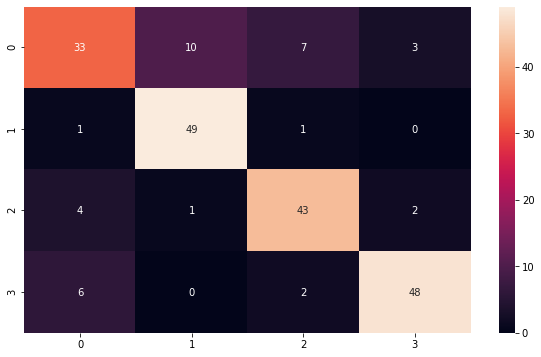

In [105]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(val_images.classes,predicted_class_indices),annot=True)
#y - true 
#x - predicted